Ce notebook contient des essais généraux concernant la descente de gradient.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

Afin d'effectuer les tests, on place la grille des $z_k$ et on choisit les $\alpha_k$ de manière aléatoire.

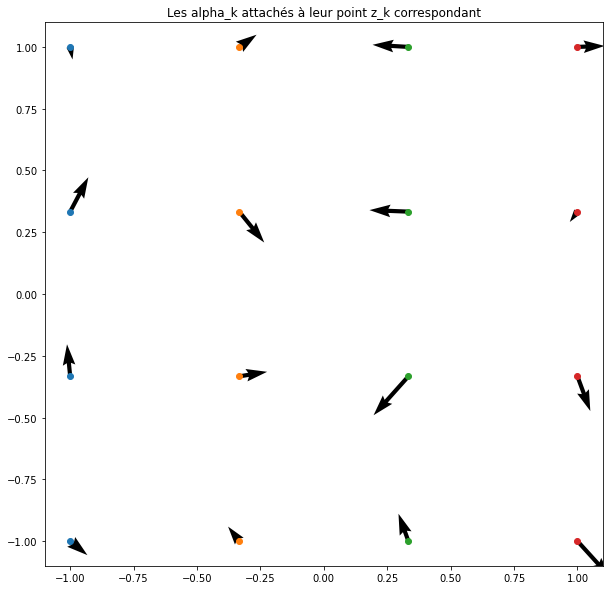

In [2]:
pas = 0.5
gauche = -1.0
droite = 1
h = int((droite - gauche)/pas)

D = h * h
zk_x, zk_y = np.meshgrid(np.linspace(gauche, droite, h),np.linspace(gauche, droite, h))
alphas_x = np.random.randn(h, h)
alphas_y = np.random.randn(h, h)

zk = np.array((zk_x.flatten(), zk_y.flatten())).T
alphas = np.array((alphas_x.flatten(), alphas_y.flatten())).T
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(zk_x, zk_y, marker= 'o', linestyle='none');
plt.quiver(zk_x, zk_y, alphas_x, alphas_y)
plt.title("Les alpha_k attachés à leur point z_k correspondant")
plt.show()

Ensuite, implémentons un algorithme de descente de gradient. On utilise les méthodes suivantes :
  - approximation du gradient par la formule $$ \frac{\partial f}{\partial x_i} (a) \approx \frac{f(a + \varepsilon e_i) - f(a)}{\varepsilon}$$
  avec $\varepsilon$ petit.
  - « backtracking line search » pour choisir le learning rate à chaque étape. voir https://en.wikipedia.org/wiki/Backtracking_line_search
  
  

In [3]:
def gradient_descent(f, start, dim, iterations=1000, epsilon=0.0001, learning_rate_guess=10.0,draw=True):
    if len(start) != dim:
        raise Exception("starting point must have right dimensions")
    #drawing stuff
    if (draw):
        points_x, points_y = [], []
    
    
    # descent point
    point = start;
    # initialise gradient var
    grad = np.array([0.0] * dim)
    # canonical base: e[0] = (1, 0, 0, ...) and e[dim - 1] = (0, 0, ..., 1).
    e = np.identity(dim)
    
    # backline search parameters
    tau = 0.5
    c = 0.5
    
    # temp vars
    m = 0.0
    t = 0.0
    l = 0.0
    
    for i in range(iterations):
        
        # roughly estimate gradient
        # df/dx_i (a) = (f(a + epsilon * e_i) - f(a)) / epsilon
        for d in range(dim):
            grad[d] = (f(point + epsilon * e[d]) - f(point)) / epsilon;
            
        m = np.dot(grad, grad);
        
       
        # backtracking line search for learning rate
        t = -c*m;
        # initial guess for learning rate
        l = learning_rate_guess
        
        # evaluate just one time at the current point
        value = f(point);

        while (value - f(point - l * grad)) < l * t:
            l = tau * l;

        # apply learning rate
        point -= l * grad;
        
        # drawing stuff
        if draw:
            points_x.append(point[0]);
            points_y.append(point[1]);
    # fin boucle gradient
    
    if draw:
        p = len(points_x)
        for i in range(p):
            plt.plot(points_x[i],points_y[i], marker= 'o', linestyle='none');
        plt.show()

    return point;

Pour tester, appliquons cet algorithme à une fonction simple dont on connais déjà le minimum : $f(x,y) = x^2 + y^2$.

On constate que la qualité d'approximation de la solution (0,0) dépend fortement des paramètres choisis
- point de départ
- nombre d'itérations
- learning rate initial à partir duquel on fait une backline search


Gradient descent with params: start= [1, 1], it= 10, lr= 0.5


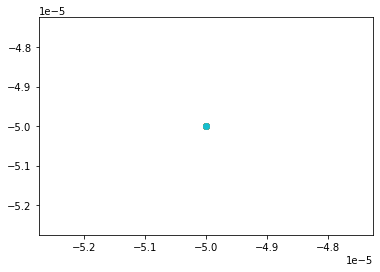

solution = [-4.99999996e-05 -4.99999996e-05]
--


Gradient descent with params: start= [1, 1], it= 10, lr= 1.0


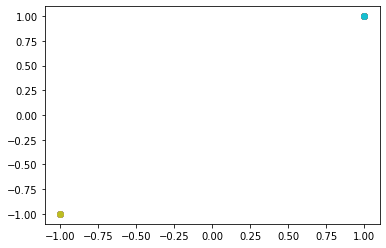

solution = [1. 1.]
--


Gradient descent with params: start= [1, 1], it= 10, lr= 5.0


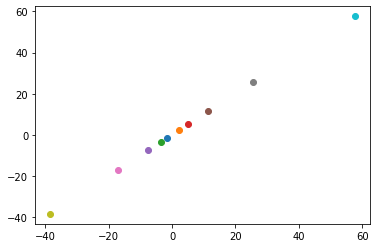

solution = [57.66787232 57.66787232]
--


Gradient descent with params: start= [1, 1], it= 10, lr= 10.0


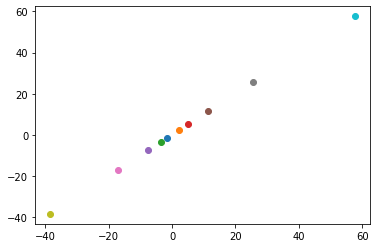

solution = [57.66787232 57.66787232]
--


Gradient descent with params: start= [1, 1], it= 10, lr= 50.0


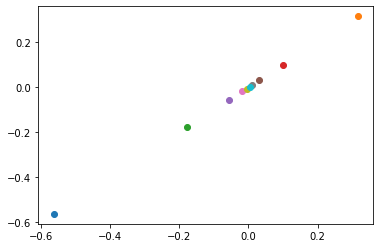

solution = [0.00312137 0.00312137]
--


Gradient descent with params: start= [1, 1], it= 10, lr= 100.0


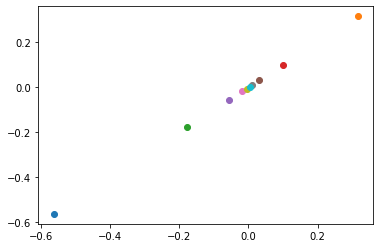

solution = [0.00312137 0.00312137]
--


Gradient descent with params: start= [1, 1], it= 100, lr= 0.5


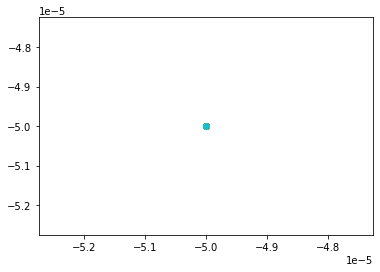

solution = [-4.99999996e-05 -4.99999996e-05]
--


Gradient descent with params: start= [1, 1], it= 100, lr= 1.0


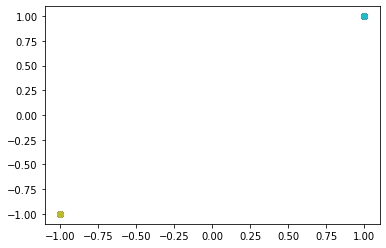

solution = [1. 1.]
--


Gradient descent with params: start= [1, 1], it= 100, lr= 5.0


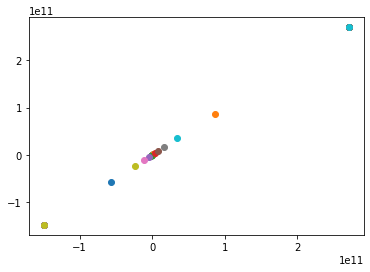

solution = [2.70562971e+11 2.70562971e+11]
--


Gradient descent with params: start= [1, 1], it= 100, lr= 10.0


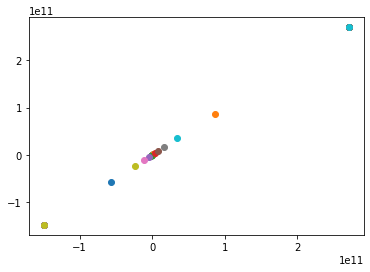

solution = [2.70562971e+11 2.70562971e+11]
--


Gradient descent with params: start= [1, 1], it= 100, lr= 50.0


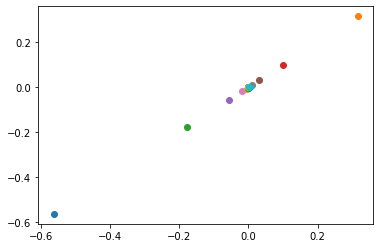

solution = [0.00083564 0.00083564]
--


Gradient descent with params: start= [1, 1], it= 100, lr= 100.0


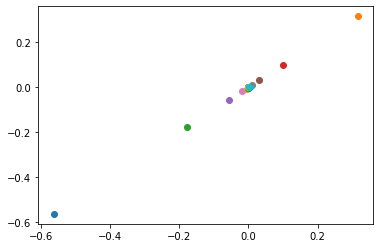

solution = [0.00083564 0.00083564]
--


Gradient descent with params: start= [10, 10], it= 10, lr= 0.5


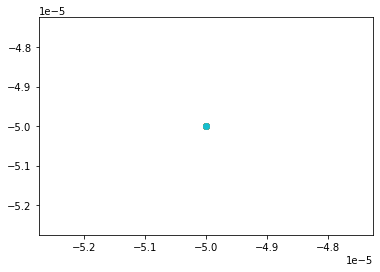

solution = [-4.99999453e-05 -4.99999453e-05]
--


Gradient descent with params: start= [10, 10], it= 10, lr= 1.0


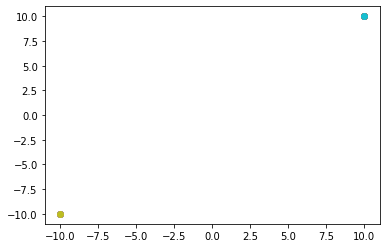

solution = [10. 10.]
--


Gradient descent with params: start= [10, 10], it= 10, lr= 5.0


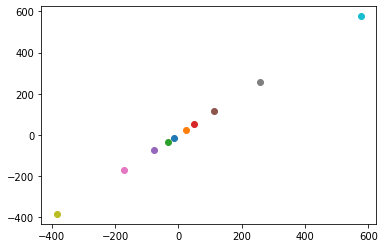

solution = [576.65322306 576.65322306]
--


Gradient descent with params: start= [10, 10], it= 10, lr= 10.0


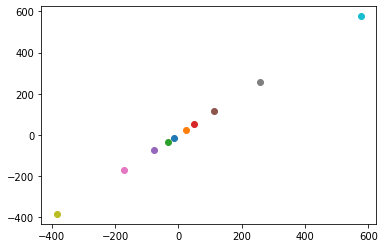

solution = [576.65322306 576.65322306]
--


Gradient descent with params: start= [10, 10], it= 10, lr= 50.0


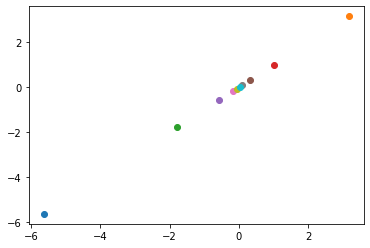

solution = [0.03166228 0.03166228]
--


Gradient descent with params: start= [10, 10], it= 10, lr= 100.0


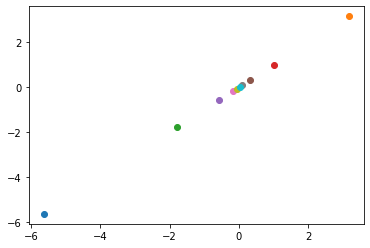

solution = [0.03166228 0.03166228]
--


Gradient descent with params: start= [10, 10], it= 100, lr= 0.5


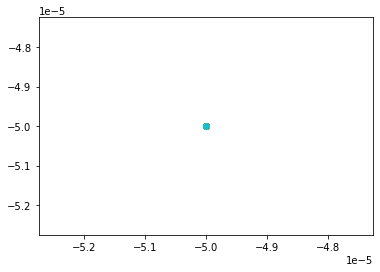

solution = [-4.99999453e-05 -4.99999453e-05]
--


Gradient descent with params: start= [10, 10], it= 100, lr= 1.0


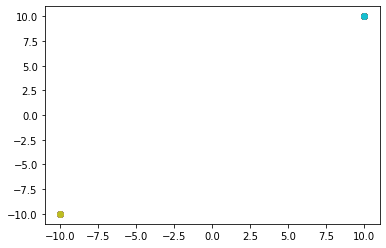

solution = [9.99999999 9.99999999]
--


Gradient descent with params: start= [10, 10], it= 100, lr= 5.0


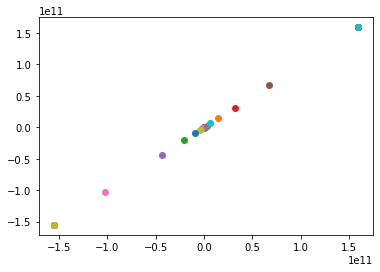

solution = [1.59220534e+11 1.59220534e+11]
--


Gradient descent with params: start= [10, 10], it= 100, lr= 10.0


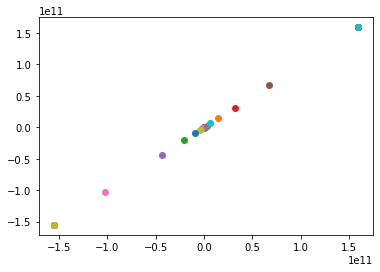

solution = [1.59220534e+11 1.59220534e+11]
--


Gradient descent with params: start= [10, 10], it= 100, lr= 50.0


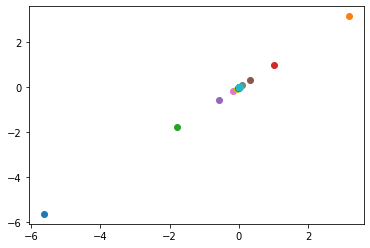

solution = [0.00057053 0.00057053]
--


Gradient descent with params: start= [10, 10], it= 100, lr= 100.0


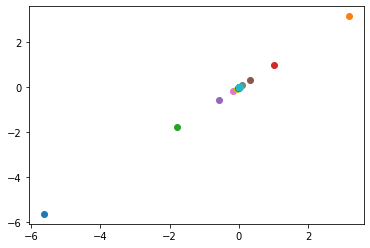

solution = [0.00057053 0.00057053]
--


Gradient descent with params: start= [100, 100], it= 10, lr= 0.5


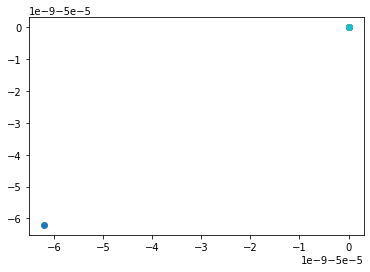

solution = [-5.e-05 -5.e-05]
--


Gradient descent with params: start= [100, 100], it= 10, lr= 1.0


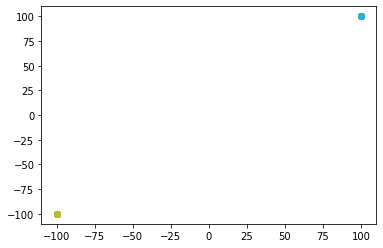

solution = [100.00000018 100.00000018]
--


Gradient descent with params: start= [100, 100], it= 10, lr= 5.0


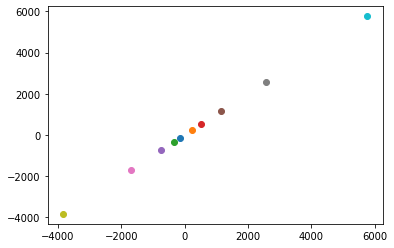

solution = [5766.50673863 5766.50673863]
--


Gradient descent with params: start= [100, 100], it= 10, lr= 10.0


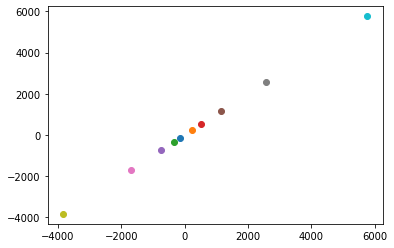

solution = [5766.50673863 5766.50673863]
--


Gradient descent with params: start= [100, 100], it= 10, lr= 50.0


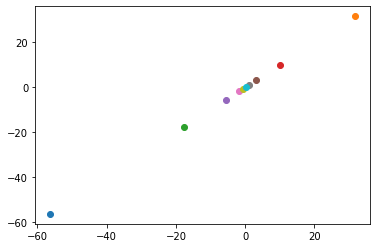

solution = [0.31707135 0.31707135]
--


Gradient descent with params: start= [100, 100], it= 10, lr= 100.0


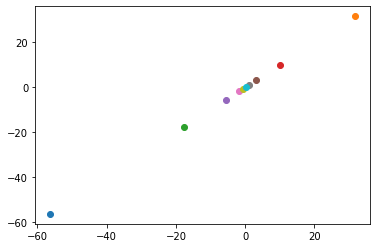

solution = [0.31707135 0.31707135]
--


Gradient descent with params: start= [100, 100], it= 100, lr= 0.5


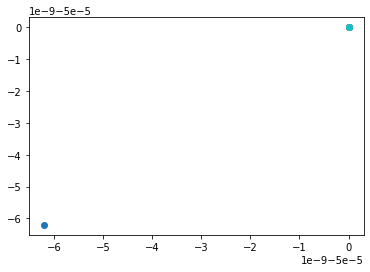

solution = [-5.e-05 -5.e-05]
--


Gradient descent with params: start= [100, 100], it= 100, lr= 1.0


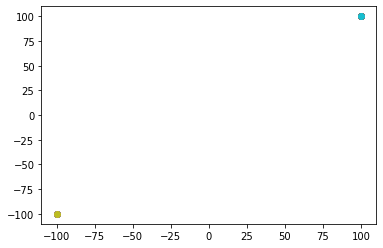

solution = [100.00000098 100.00000098]
--


Gradient descent with params: start= [100, 100], it= 100, lr= 5.0


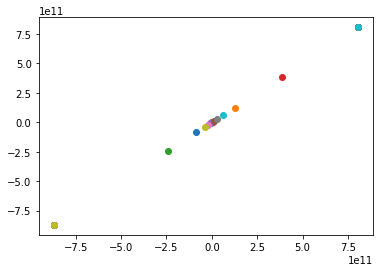

solution = [8.06661184e+11 8.06661184e+11]
--


Gradient descent with params: start= [100, 100], it= 100, lr= 10.0


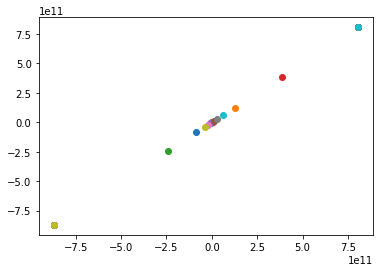

solution = [8.06661184e+11 8.06661184e+11]
--


Gradient descent with params: start= [100, 100], it= 100, lr= 50.0


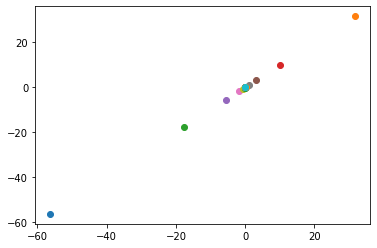

solution = [0.00159258 0.00159258]
--


Gradient descent with params: start= [100, 100], it= 100, lr= 100.0


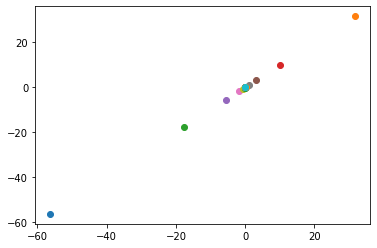

solution = [0.00159258 0.00159258]
--


Gradient descent with params: start= [1000, 1000], it= 10, lr= 0.5


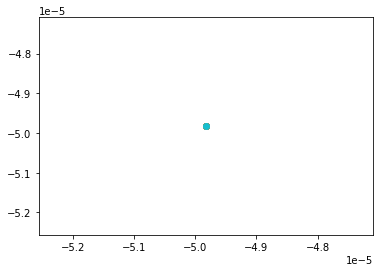

solution = [-4.98257577e-05 -4.98257577e-05]
--


Gradient descent with params: start= [1000, 1000], it= 10, lr= 1.0


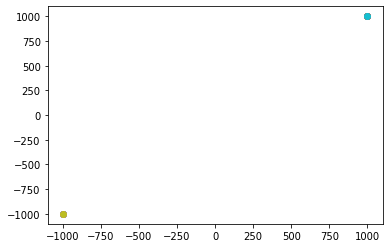

solution = [999.99999534 999.99999534]
--


Gradient descent with params: start= [1000, 1000], it= 10, lr= 5.0


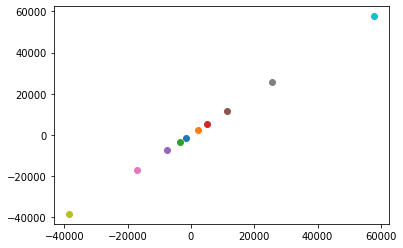

solution = [57665.04250257 57665.04250257]
--


Gradient descent with params: start= [1000, 1000], it= 10, lr= 10.0


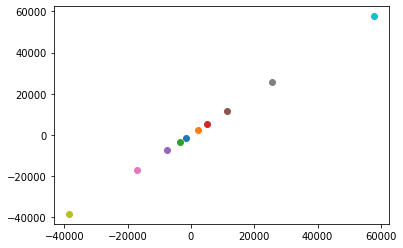

solution = [57665.04250257 57665.04250257]
--


Gradient descent with params: start= [1000, 1000], it= 10, lr= 50.0


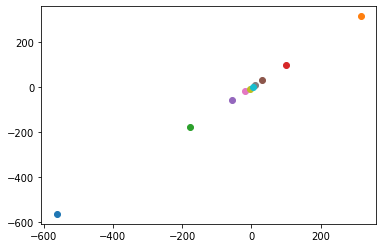

solution = [3.17116209 3.17116209]
--


Gradient descent with params: start= [1000, 1000], it= 10, lr= 100.0


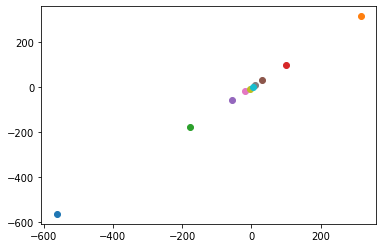

solution = [3.17116209 3.17116209]
--


Gradient descent with params: start= [1000, 1000], it= 100, lr= 0.5


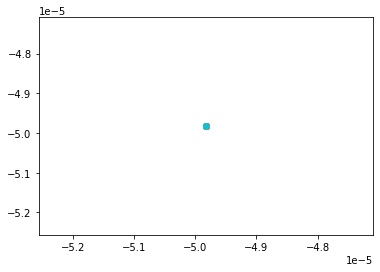

solution = [-4.98257577e-05 -4.98257577e-05]
--


Gradient descent with params: start= [1000, 1000], it= 100, lr= 1.0


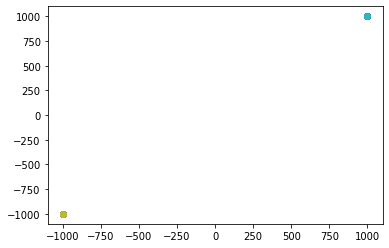

solution = [999.99999534 999.99999534]
--


Gradient descent with params: start= [1000, 1000], it= 100, lr= 5.0


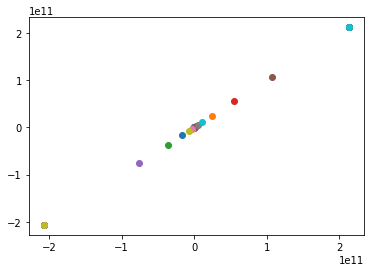

solution = [2.12693158e+11 2.12693158e+11]
--


Gradient descent with params: start= [1000, 1000], it= 100, lr= 10.0


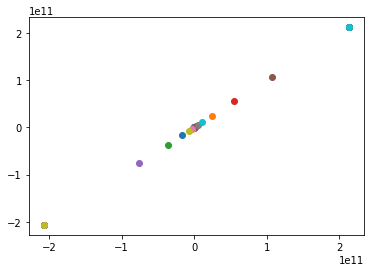

solution = [2.12693158e+11 2.12693158e+11]
--


Gradient descent with params: start= [1000, 1000], it= 100, lr= 50.0


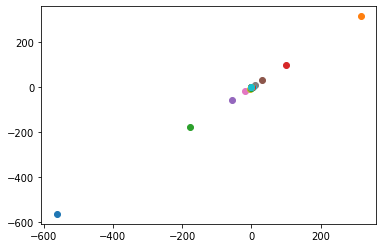

solution = [0.00110094 0.00110094]
--


Gradient descent with params: start= [1000, 1000], it= 100, lr= 100.0


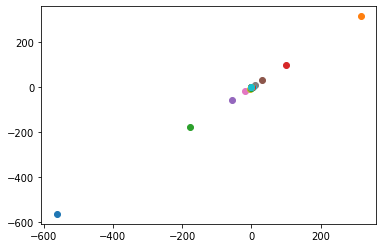

solution = [0.00110094 0.00110094]
--


done!


In [4]:


# La fonction à minimiser, ici de deux variables
def toto(param):
    return param[0] * param[0] + param[1] * param[1];

# dimension de l'espace ambiant
d = 2



import itertools

starting_points = [[1, 1], [10, 10], [100, 100], [1000, 1000]]
#it = [10, 100, 500]
it = [10,100]
lr = [0.5, 1.0, 5.0, 10.0, 50.0, 100.0]
parameters = [starting_points, it, lr]

for param in itertools.product(*parameters):
    print("Gradient descent with params: start= {}, it= {}, lr= {}".format(param[0], param[1], param[2]))
    result = gradient_descent(toto, start=param[0], dim=d, iterations=param[1], learning_rate_guess=param[2]);
    print("solution =", result)
    print("--")
    print("")
    print("")

print("done!")

On veut maintenant appliquer la descente de gradient à notre fonctionnelle J $$J(v) = |v|^2 + \lambda D(\varphi_v(S), T)$$

On définit pour commencer la distance de Hausdorff.

In [5]:
def maxmin(A,B): # max sur les i du min sur les j, avec A et B des listes de k-uplets
    max_list = []
    for a in A:
        min_list = []
        for b in B:
            min_list.append(np.linalg.norm(a - b))
        max_list.append(np.min(min_list))
    return np.max(max_list)


# Distance de Hausdorff entre deux tableaux numpy.
def dist(A,B):
    return max(maxmin(A,B),maxmin(B,A))

A = np.array([[0., 0.], [1., 0.], [1., 1.]])

print(dist(A, A))

B = np.array([[0., 0.], [0., 1.], [1., 1.]])
print(dist(A, B))

B = np.array([[0., 0.], [0., 1.], [1., 1.], [1., 0.]])
print(dist(A, B))

0.0
1.0
1.0


Un élément $v$ sera encodé par ses coordonnées dans la base évoquée à la question 6 : $$v = \sum_{0 \leq k < D} v_k E_k, \text{  } v_k \in \mathbb{R}$$
    avec $$E_k(x) = \alpha_k e^{-|x - z_k|^2}$$

L'espace vectoriel $V$ est donc de dimension $D$, le nombre de $(z_k)$, ce qui sera donc la dimension utilisée pour la descente de gradient.

On implémente la fonction $\varphi_v$ ainsi que l'image directe par celle-ci.

In [6]:
# Calcule phi_v(point), point étant un point de l'espace ambiant
def phi_point(v, point):
    result = np.copy(point) # on ne veut pas modifier la référence...
    for i in range(D):
        # z est un point de la grille, alpha le vecteur associé
        result += v[i] * np.exp(- (np.linalg.norm(point - zk[i])**2)) * alphas[i];
    return result;

# Renvoie l'image directe du tableau de points passé en argument par phi
def phi_array(v, points):
    result = [];
    
    for point in points:
        result.append(phi_point(v, point))
    
    return np.array(result);

In [7]:
# Quelques tests

# Formes aléatoires de dix points
S = np.random.randn(10, 2)
T = S * 0.95


v = np.array([0] * D)
print("v=", v)

print("S=", S)
print("phi_v(S)=", phi_array(v, S))

v = np.random.randn(D)
print("v=", v)

print("S=", S)
print("phi_v(S)=", phi_array(v, S))


v= [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
S= [[ 2.72504478 -1.1935857 ]
 [-2.52148367 -1.24916034]
 [ 0.6596389  -0.57760544]
 [-0.08850243  1.33735158]
 [ 0.98280421  0.05007831]
 [-1.88700209  1.37330355]
 [-0.13420848 -0.6476972 ]
 [ 2.53875987 -1.67297182]
 [ 0.62186101  1.05776189]
 [-0.13327564  0.89117025]]
phi_v(S)= [[ 2.72504478 -1.1935857 ]
 [-2.52148367 -1.24916034]
 [ 0.6596389  -0.57760544]
 [-0.08850243  1.33735158]
 [ 0.98280421  0.05007831]
 [-1.88700209  1.37330355]
 [-0.13420848 -0.6476972 ]
 [ 2.53875987 -1.67297182]
 [ 0.62186101  1.05776189]
 [-0.13327564  0.89117025]]
v= [-0.37117498  0.10760481 -1.54297859 -1.10787838  0.94520679 -0.63878193
 -0.95077349 -0.92271471  1.60198091 -0.96966486 -0.7284601   1.69689476
 -1.89436355 -0.25955894 -1.8186199  -1.43468543]
S= [[ 2.72504478 -1.1935857 ]
 [-2.52148367 -1.24916034]
 [ 0.6596389  -0.57760544]
 [-0.08850243  1.33735158]
 [ 0.98280421  0.05007831]
 [-1.88700209  1.37330355]
 [-0.13420848 -0.6476972 ]
 [ 2.53875987 -1.

Puis la fonctionnelle $J : \mathbb{R}^l \to \mathbb{R}^{+}$ à minimiser en $v$.
$$J(v) = |v|^2 + \lambda D(\varphi_v(S), T)$$


In [8]:
weight = 1.0;

def J(v, source, target):
    return np.linalg.norm(v)**2 + weight * dist(phi_array(v, source), target);

Quelques tests basiques.

In [9]:
# À nouveau quelques tests
S = np.random.randn(10, 2)
T = S * 0.95

v = np.random.randn(D)
print("v=", v)

print("S=", S)
print("phi_v(S)=", phi_array(v, S))

for i in range(10):
    print(J((0.1 * i) * v, S , T));

v= [ 0.68501902  0.48041512 -2.17310313 -1.11371606 -0.1229084  -1.05631227
 -0.14237678 -0.662912   -0.19727408 -0.94160896 -1.03725819 -0.83551742
  1.36264234 -0.02208958  0.76830617  1.08942715]
S= [[ 1.07876766  0.85556001]
 [ 0.45915575 -0.25401129]
 [-0.23927067  0.42460642]
 [ 1.17013117  0.35922996]
 [ 0.54605093 -0.53462818]
 [-1.83542727 -1.41649688]
 [ 0.59745557 -0.29168723]
 [ 1.38615214  2.663848  ]
 [ 0.43241491  0.26158569]
 [ 1.22367528 -2.20056407]]
phi_v(S)= [[ 2.09900589  1.42434282]
 [ 0.45175866  0.37911657]
 [-0.8371816   0.97447942]
 [ 1.9883688   1.3229508 ]
 [ 0.24959466 -0.12625169]
 [-1.71507684 -1.57334686]
 [ 0.58237334  0.49013251]
 [ 1.4234925   2.66806569]
 [ 0.90218924  1.19968275]
 [ 1.00963102 -2.07628093]]
0.15014579531660396
0.330956465450457
0.8896803939742491
1.7449515298532665
2.892205731762658
4.298919732337664
6.02032497314363
8.033481646585502
10.338388429597751
12.935044551358489


Pour mieux se rendre compte, il faudrait dessiner.

v= [ 0.26575263  0.11024829  0.06331018  0.07680517 -0.13431283 -0.08761211
 -0.13368308  0.06894487 -0.03438296 -0.25426341 -0.03517705  0.06491304
 -0.07380935  0.19657236 -0.26313596 -0.01406762]


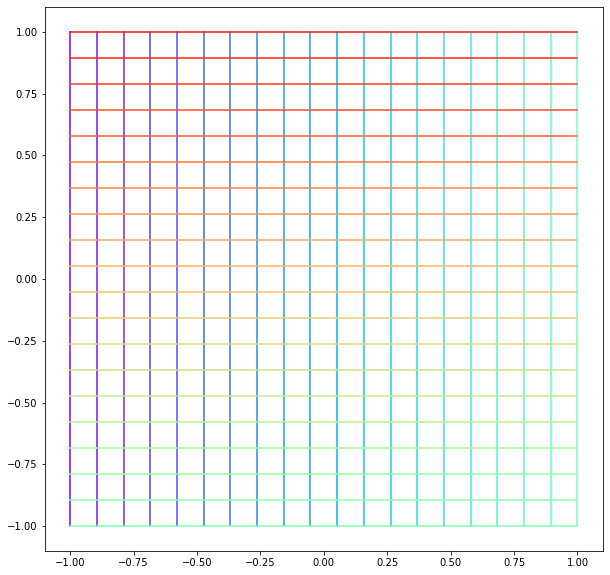

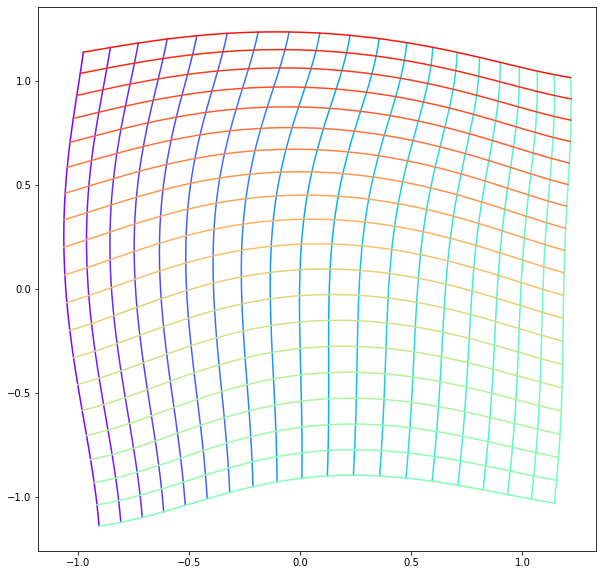

In [10]:
def vraie_grille(fonc, xmin=-1, xmax=1, ymin=-1, ymax=1, n_lignes=20, n_points_ligne=40):
    
    fig, ax = plt.subplots(figsize=(10, 10))
    lignes = []
    
    for x in np.linspace(xmin, xmax, n_lignes): #à x fixé, donc on itère sur les lignes verticales
        lignes.append([fonc(x,y) for y in np.linspace(ymin, ymax, n_points_ligne)]) #on remplit la ligne
    for y in np.linspace(ymin, ymax, n_lignes): #à y fixé, donc on itère sur les lignes horizontales
        lignes.append([fonc(x,y) for x in np.linspace(xmin, xmax, n_points_ligne)])
    
    i = 0
    p = len(lignes)
    for l in lignes:
        k = i/p # à partir du numéro d'indice de chaque ligne, on associe un nombre entre 0 et 1 pour assigner une couleur avec cm.get_cmap de matplotlib
        a,b = zip(*l) #extraire les abscisses et ordonnées 
        i = i + 1
        plt.plot(a,b,color=plt.cm.get_cmap("rainbow")(k))
    
    plt.show()

def iden(x,y):
    return x,y

v = 0.2 * np.random.randn(D)
print("v=", v)

def phi_v_pour_grille(x,y):
    return phi_point(v, np.array([x, y]));

def show_v(v):
    vraie_grille(iden)
    vraie_grille(phi_v_pour_grille)


show_v(v)


Maintenant on va essayer avec des formes !

In [11]:
# copié-collé du notebook dans le mail du 24/01 de Mme.Gris
import json

path_data = './shapes/' # à modifier selon où se trouve les fichiers
with open(path_data + 'bell-1.json', 'r') as f:
    bell = json.load(f)
with open(path_data + 'hat-1.json', 'r') as f:
    hat = json.load(f)

# Quelques fonctions utilitaires pour lire les JSON facilement
def json_to_points(obj):
    result =[];

    for p in obj['points']:
        result.append([p['x'], p['y']])
        
    return np.array(result) * 2.0 - 1.0

bell_points = json_to_points(bell)
hat_points = json_to_points(hat)

# Dessine un nuage de points (array de 2-arrays)
def show_points(points):
    plt.scatter(*zip(*points))
    plt.show()

v= [-0.04676609 -0.05956421 -0.17929617 -0.23784957  0.00363312  0.20367827
  0.04379565 -0.1083608   0.0114206   0.04261635  0.08983703 -0.10128593
 -0.03774993 -0.04018733  0.04047543 -0.1302958 ]


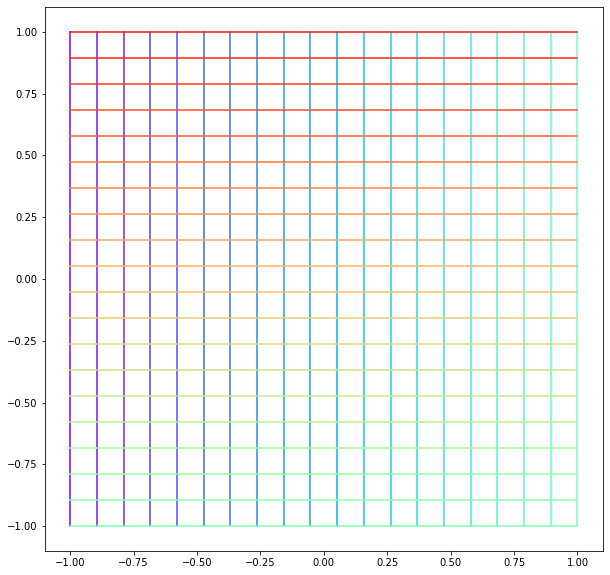

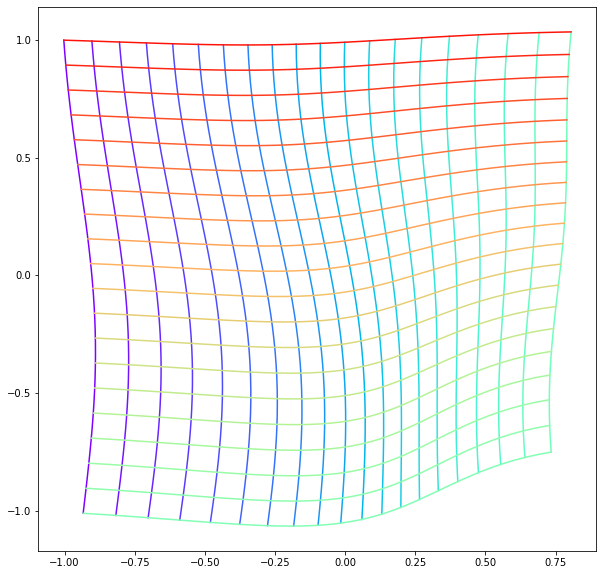

la cloche originale


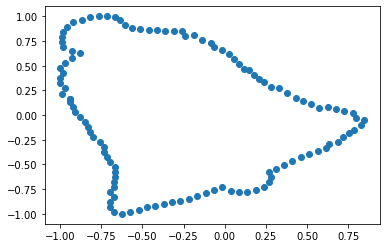

la cloche déformée par le v plus haut


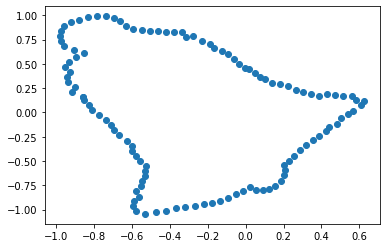

La distance de Hausdorff entre les deux = 0.27843331387877934
----
le chapeau original


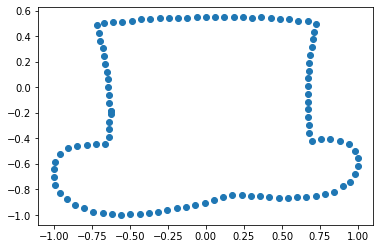

le chapeau déformé par le v plus haut


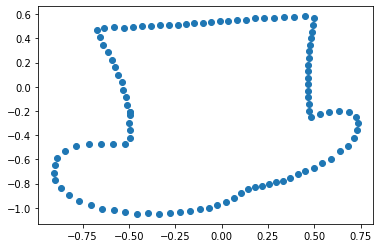

La distance de Hausdorff entre les deux = 0.3672203784309458


In [12]:
v = 0.1 * np.random.randn(D)

print("v=", v)
show_v(v)

S = bell_points
print("la cloche originale")
show_points(S)

T = phi_array(v, S)

print("la cloche déformée par le v plus haut")
show_points(T)

print("La distance de Hausdorff entre les deux =", dist(S, T))
print("----")

S = hat_points
print("le chapeau original")
show_points(S)

T = phi_array(v, S)

print("le chapeau déformé par le v plus haut")
show_points(T)

print("La distance de Hausdorff entre les deux =", dist(S, T))


On tente maintenant d'appliquer l'algorithme de descente de gradient pour minimiser la fonctionelle J.

best_v= [ 1.36514057 -2.06774887 -3.90148973  8.63516824  1.33250424  0.34163503
  6.02202796 12.76023893 -1.61778771  3.86955383 -2.81483602  3.4787144
 -0.74677553  2.55793257 -1.51544407  1.25633618]
J(best_v)= 376.1507830716792
Dist(phi_v(S), T)= 30.87418044932844
norm(v)= 18.587598840476133
S:


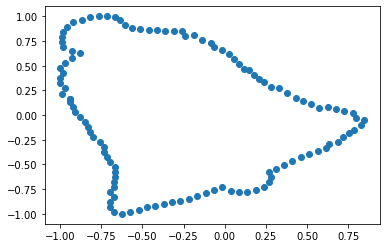

T:


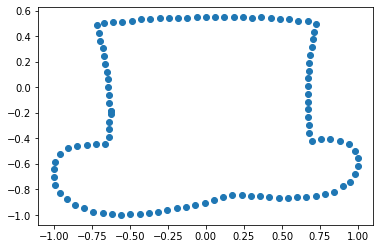

phi_v(S):


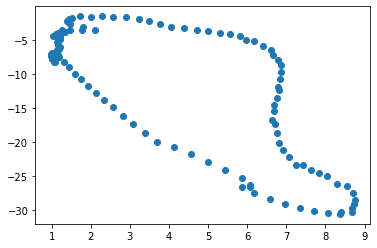

In [15]:
v0 = np.random.randn(D)

S = bell_points
T = hat_points

best_v = gradient_descent(lambda x: J(x, S, T) , start=v0, dim=D, iterations=10, learning_rate_guess=1.0, draw=False);

print("best_v=", best_v)
print("J(best_v)=", J(best_v, S, T))

result = phi_array(best_v, S)
print("Dist(phi_v(S), T)=", dist(S, result))
print("norm(v)=", np.linalg.norm(best_v))

print("S:")
show_points(S)

print("T:")
show_points(T)

print("phi_v(S):")
show_points(result)


Et euh... ça marche pas des masses et ça mouline beaucoup. Affaire à suivre !!